In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, r2_score
from sklearn.metrics import plot_confusion_matrix
import joblib
from sklearn.model_selection import train_test_split

In [18]:
dataset = pd.read_csv("/home/tintin/Study/Data-science/Statistical-machine-learning/Learn-Logistic-Regression/Datasets/iphone_purchase_records.csv")
dataset

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [19]:
X_train = dataset.iloc[0:300,[1,2]].values
Y_train = dataset.iloc[0:300,3].values
X_test = dataset.iloc[300:-1,[1,2]].values
Y_test = dataset.iloc[300:-1,3].values

In [20]:
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [21]:
def VisualizingDataset(X_, Y_):
    X1 = X_[:, 0]
    X2 = X_[:, 1]
    for i, label in enumerate(np.unique(Y_)):
        plt.scatter(X1[Y_ == label], X2[Y_ == label],
            color = ListedColormap(("red", "green"))(i),
            label = label)

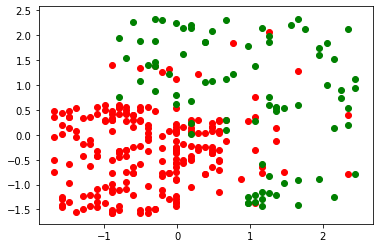

In [22]:
VisualizingDataset(X_train, Y_train)
plt.show()

In [23]:
classifier = LogisticRegression(random_state= 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
cm = confusion_matrix(Y_train, classifier.predict(X_train))
print(cm)

[[208  11]
 [ 31  50]]


In [25]:
def VisualizingResult(model, X_):
    X1 = X_[:, 0]
    X2 = X_[:, 1]
    X1_range = np.arange(start= X1.min()-1, stop= X1.max()+1, step = 0.01)
    X2_range = np.arange(start= X2.min()-1, stop= X2.max()+1, step = 0.01)
    X1_matrix, X2_matrix = np.meshgrid(X1_range, X2_range)
    X_grid= np.array([X1_matrix.ravel(), X2_matrix.ravel()]).T
    Y_grid= model.predict(X_grid).reshape(X1_matrix.shape)
    plt.contourf(X1_matrix, X2_matrix, Y_grid, alpha = 0.5, cmap = ListedColormap(("red", "green")))

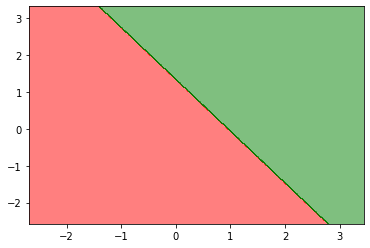

In [26]:
VisualizingResult(classifier, X_train)
plt.show()

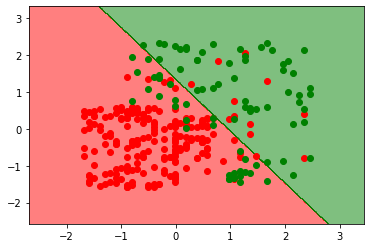

In [27]:
VisualizingResult(classifier, X_train)
VisualizingDataset(X_train, Y_train)
plt.show()

In [28]:
cm = confusion_matrix(Y_test, classifier.predict(X_test))
print(cm)


[[36  2]
 [22 39]]


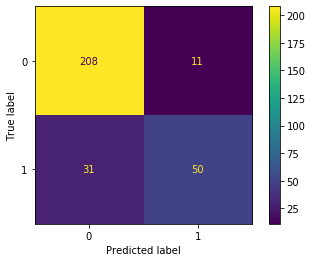

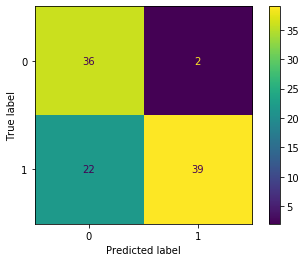

In [29]:
plot_confusion_matrix(classifier, X_train, Y_train)
plot_confusion_matrix(classifier, X_test, Y_test)

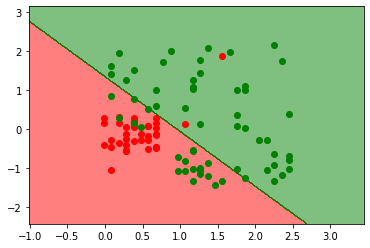

In [30]:
VisualizingResult(classifier, X_test)
VisualizingDataset(X_test, Y_test)
plt.show()

In [31]:
def compare(i_example):
    x = X_test[i_example : i_example + 1]
    y = Y_test[i_example]
    y_pred = classifier.predict(x)
    x_inv = SC.inverse_transform(x)
    print(x_inv, y, y_pred)

In [32]:
for i in range(7, 12):
    compare(i)

[[4.70e+01 1.13e+05]] 1 [1]
[[3.60e+01 1.25e+05]] 1 [1]
[[3.8e+01 5.0e+04]] 0 [0]
[[4.2e+01 7.0e+04]] 0 [0]
[[3.9e+01 9.6e+04]] 1 [0]
